# Name:-Manish kumar yadav
# Roll:-23
# Prn :-2122000230
# Support Vector Machines (SVM) on the diabetes dataset

In [60]:
import numpy as np
import pandas as pd
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [61]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [62]:
x = df.iloc[:, 0:-1].values
y = df.iloc[:, -1].values

In [63]:
x

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

# Without preprocessing 

In [64]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)

In [65]:
x_train.shape

(614, 8)

In [66]:
from sklearn.metrics import accuracy_score
from sklearn import svm

classifier = svm.SVC(kernel='linear')
classifier.fit(x_train, y_train)

SVC(kernel='linear')

In [67]:
y_pred = classifier.predict(x_test)
accuracy = accuracy_score(y_pred, y_test)
print("Accuracy score of test data: ", accuracy)

Accuracy score of test data:  0.7272727272727273


# With Preprocessing 

In [68]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [69]:
x_train_scaled

array([[ 1.28218502, -0.00919894, -3.69291041, ..., -0.22972222,
        -0.87864446,  0.40477138],
       [ 1.28218502,  0.17598627,  0.24307545, ..., -0.75949753,
        -0.94417118,  0.49106639],
       [ 0.05639817,  0.73154191, -0.60794852, ..., -0.29432897,
        -0.5541312 ,  0.31847637],
       ...,
       [ 0.05639817, -0.935125  , -3.69291041, ..., -0.4881492 ,
         0.45373211, -0.19929369],
       [-0.86294196, -0.28697676,  0.88134343, ..., -0.21680087,
        -1.00345726, -0.88965376],
       [ 0.6692916 , -0.16351995, -0.50157052, ...,  0.24836769,
        -0.68518463,  0.5773614 ]])

In [70]:
classifier = svm.SVC(kernel='linear')
linear = classifier.fit(x_train_scaled , y_train)

In [71]:
y_pred = classifier.predict(x_test_scaled)
accuracy = accuracy_score(y_pred, y_test)
print("Accuracy score of test data: ", accuracy)

Accuracy score of test data:  0.7337662337662337


# RBF

In [72]:
rbf = svm.SVC(kernel='rbf')
rbf = rbf.fit(x_train_scaled,y_train)

In [73]:
y_pred = rbf.predict(x_test_scaled)
accuracy = accuracy_score(y_pred, y_test)
print("Accuracy score of test data the rbf: ", accuracy)

Accuracy score of test data the rbf:  0.7727272727272727


# RBF with gamma and C value

In [74]:
from sklearn import svm
rbf1 = svm.SVC(kernel='rbf', gamma='auto', C=7)
rbf1.fit(x_train_scaled, y_train)

SVC(C=7, gamma='auto')

In [75]:
y_pred = rbf1.predict(x_test_scaled)
accuracy = accuracy_score(y_pred, y_test)
print("Accuracy score of test data the rbf with gamma: ", accuracy)

Accuracy score of test data the rbf with gamma:  0.7467532467532467


# Poly 

In [76]:
from sklearn import svm

poly = svm.SVC(kernel='poly')
poly.fit(x_train_scaled, y_train)


SVC(kernel='poly')

In [77]:
y_pred = poly.predict(x_test_scaled)
accuracy = accuracy_score(y_pred, y_test)
print("Accuracy score of test data the poly: ", accuracy)

Accuracy score of test data the poly:  0.7207792207792207


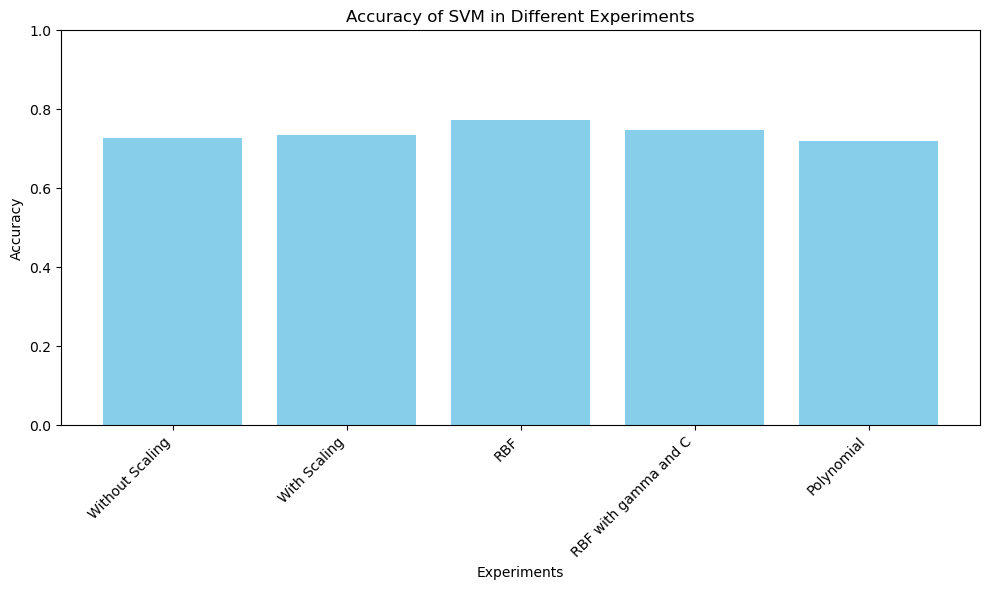

In [78]:
import matplotlib.pyplot as plt

svm_accuracies = {
    "Without Scaling":0.7272,
    "With Scaling":0.7337,
    "RBF":0.7727,
    "RBF with gamma and C":0.7467 ,
    "Polynomial": 0.7207
}


experiments = list(svm_accuracies.keys())
accuracies = list(svm_accuracies.values())

plt.figure(figsize=(10, 6))
plt.bar(experiments, accuracies, color='skyblue')
plt.xlabel('Experiments')
plt.ylabel('Accuracy')
plt.title('Accuracy of SVM in Different Experiments')
plt.ylim(0, 1)  
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()


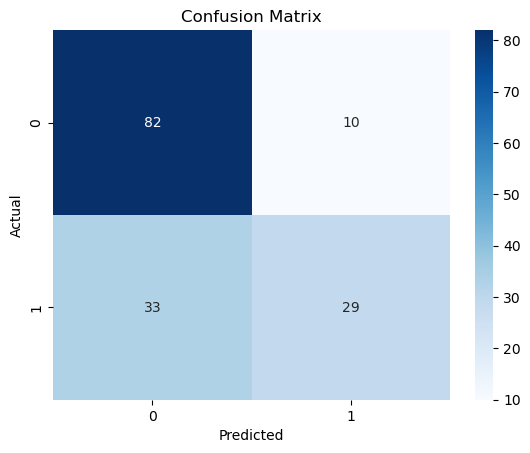

Confusion Matrix:
[[82 10]
 [33 29]]


In [79]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
plot_confusion_matrix(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

In [81]:
input_data = [1, 85, 72, 40, 0, 25, 0.627, 50]
prediction = classifier.predict([input_data])

if prediction == 0:
    print("The person is not diabetic")
else:
    print("The person is diabetic")

The person is diabetic
